Análisis exploratorio de los datos

In [18]:
user_review = r'C:\Users\argui\OneDrive\Escritorio\ProyectoML_OPS\data\user_reviews.parquet'
users_items = r"C:\Users\argui\OneDrive\Escritorio\ProyectoML_OPS\data\users_items.parquet"
steam_games = r"C:\Users\argui\OneDrive\Escritorio\ProyectoML_OPS\data\steam_games_EDA.parquet"
user_items_re = r"C:\Users\argui\OneDrive\Escritorio\ProyectoML_OPS\data\users_items_review.parquet"

In [19]:
#importamos las librerías que usaremos

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import gzip

Comenzamos analizando output_steam_games

In [20]:
#inspeccionamos el parquet
steam_games = pd.read_parquet(steam_games)
steam_games.head(5)

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,None,None,None,None,None,None,None,None,None,0.0,NaN,NaN,None
1,None,None,None,None,None,None,None,None,None,0.0,NaN,NaN,None
2,None,None,None,None,None,None,None,None,None,0.0,NaN,NaN,None
3,None,None,None,None,None,None,None,None,None,0.0,NaN,NaN,None
4,None,None,None,None,None,None,None,None,None,0.0,NaN,NaN,None


In [21]:
#contabilizamos los nulos en cada columna
steam_games.isna().sum()


publisher       96362
genres          91593
app_name        88312
title           90360
url             88310
release_date    90377
tags            88473
reviews_url     88312
specs           88980
price               0
early_access    88310
id              88312
developer       91609
dtype: int64

In [22]:
#Contabilizamos las columnas duplicadas
duplicados = steam_games.dropna() #Eliminamos los nulos
conteo = duplicados['id'].value_counts() #Contamos la cantidad de veces que se repite un valor
valores_duplicados = conteo[conteo>1] #Filtramos solo los valores que se repiten más de una vez
print('ids duplicados:')
print(valores_duplicados)


ids duplicados:
id
612880.0    2
Name: count, dtype: int64


In [23]:
#Desanidamos los géneros

steam_games = steam_games.explode('genres')
steam_games.head()

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,None,None,None,None,None,None,None,None,None,0.0,NaN,NaN,None
1,None,None,None,None,None,None,None,None,None,0.0,NaN,NaN,None
2,None,None,None,None,None,None,None,None,None,0.0,NaN,NaN,None
3,None,None,None,None,None,None,None,None,None,0.0,NaN,NaN,None
4,None,None,None,None,None,None,None,None,None,0.0,NaN,NaN,None


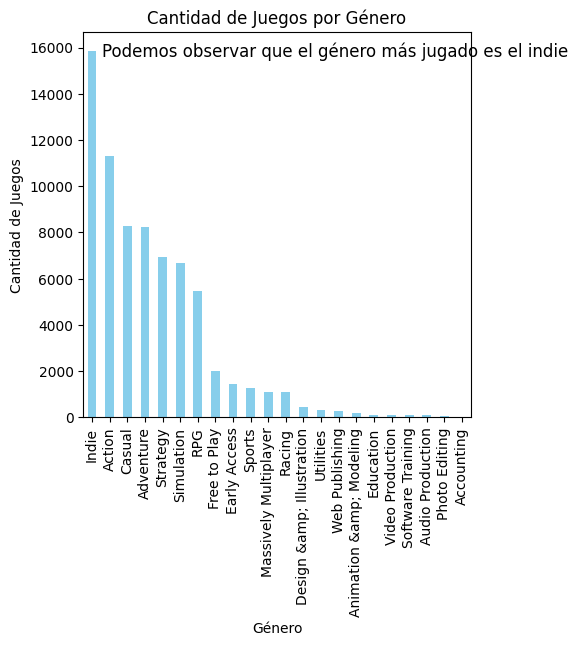

In [24]:
# Ahora contamos la cantidad de juegos por género
conteo_por_genero = steam_games['genres'].value_counts()

# Ordenamos los valores por cantidad de juegos
conteo_por_genero = conteo_por_genero.sort_values(ascending=False)

# Creamos el gráfico de barras
plt.figure(figsize=(5, 5))
conteo_por_genero.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Juegos por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad de Juegos')
plt.xticks(rotation=90)
plt.text(0.65, 0.95, 'Podemos observar que el género más jugado es el indie', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12)

plt.show()

#podemo

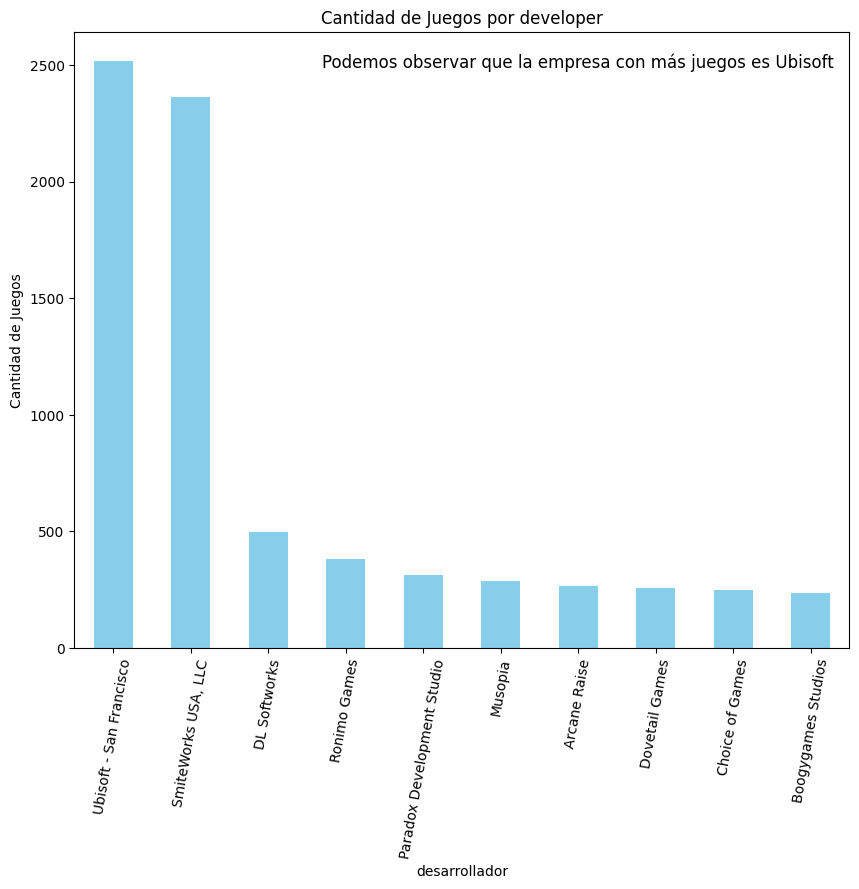

In [25]:
# Ahora contamos la cantidad de juegos por desarrollador
conteo_por_dev = steam_games['developer'].value_counts()

# Ordenamos los valores por cantidad de juegos
conteo_por_dev = conteo_por_dev.sort_values(ascending=False).head(10)

# Creamos el gráfico de barras
plt.figure(figsize=(10, 8))
conteo_por_dev.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Juegos por developer')
plt.xlabel('desarrollador')
plt.ylabel('Cantidad de Juegos')
plt.xticks(rotation=80)
plt.text(0.65, 0.95, 'Podemos observar que la empresa con más juegos es Ubisoft', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=12)

plt.show()


Ahora analizaremos el dataset user_reviews

In [26]:
#Creamos una lista donde insertaremos las líneas

lista = []

# Abrir el archivo y procesar cada línea
with gzip.open(r'C:\Users\argui\OneDrive\Escritorio\ProyectoML_OPS\data\user_reviews.json.gz', 'rt', encoding='utf-8') as f:
    for linea in f:
        try:
            # Usar ast.literal_eval para convertir la línea en un diccionario
            json_data = ast.literal_eval(linea)
            lista.append(json_data)
        except ValueError as e:
            print(f"Error en la línea: {linea}")
            continue

#Creamos un DataFrame a partir de la lista de diccionarios
df_revi = pd.DataFrame(lista)    
df_revi = df_revi.reset_index(drop=True) 
df_revi.head(3)

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',..."


In [27]:
#Con el fin de optimizar las consultas eliminaré la columna user_url

df_revi = df_revi.drop(columns='user_url')
df_revi.head(3)

,user_id,reviews
0,76561197970982479,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."
2,evcentric,"[{'funny': '', 'posted': 'Posted February 3.',..."


In [28]:
"""Como podemos analizar a simple vista, la columna reviews está anidada 
y necesitaremos desanidarla, es una lista de diccionarios para el EDA"""

df_revi = df_revi.explode('reviews').reset_index()

#ahora creamos una nueva columna por cada elemento de la lista en la columna items
df_revi = pd.concat([df_revi,pd.json_normalize(df_revi['reviews'])],axis=1)

#eliminamos las columbas index y la columna items
df_revi.drop(columns=['reviews'],inplace=True)
df_revi.drop(columns=['index'],inplace=True)

#Eliminamos las columna que no nos ayuden al análisis
df_revi = df_revi.drop(columns=['last_edited'])
df_revi = df_revi.drop(columns=['helpful'])
df_revi = df_revi.drop(columns=['funny'])


df_revi.head(3)
#pasamos de tener 2 columnas, a 

,user_id,posted,item_id,recommend,review
0,76561197970982479,"Posted November 5, 2011.",1250,True,Simple yet with great replayability. In my opi...
1,76561197970982479,"Posted July 15, 2011.",22200,True,It's unique and worth a playthrough.
2,76561197970982479,"Posted April 21, 2011.",43110,True,Great atmosphere. The gunplay can be a bit chu...


In [29]:
#Analizaremos la cantidad de nulos
df_revi.isna().sum()

user_id       0
posted       28
item_id      28
recommend    28
review       28
dtype: int64

In [30]:
#Analizaremos si hay repetidos y para ello eliminaremos nulos

#
duplicados = df_revi.dropna() #Eliminamos los nulos
conteo = duplicados['user_id'].value_counts() #Contamos la cantidad de veces que se repite un valor
valores_duplicados = conteo[conteo>1] #Filtramos solo los valores que se repiten más de una vez
print('ids duplicados:')
print(valores_duplicados)
 #Hay muchos duplicados

ids duplicados:
user_id
76561198094665607    20
dannysfatass         20
76561198064484479    20
chicken_tonight      20
MIMMATA              20
                     ..
76561198084189953     2
JsaKim                2
76561198089117691     2
76561198089434180     2
hwarm                 2
Name: count, Length: 12063, dtype: int64


In [31]:
#Eliminaremos duplicados
sin_duplicados = df_revi.drop_duplicates(keep='first') 
print('el tamaño del df con valores duplicados: ',df_revi.shape)
print('el tamaño del df sin valores duplicados: ',sin_duplicados.shape)

el tamaño del df con valores duplicados:  (59333, 5)
el tamaño del df sin valores duplicados:  (58459, 5)


In [32]:
#Realizamos el análisis de sentimiento para comenzar optimizar consultas
df = duplicados.copy()
from textblob import TextBlob
# Función para asignar el valor de sentimiento
def analisis_sent(review:str) -> int:
  
    if not review:
        return 1  # Valor neutro si no hay texto
    else:
        analisis = TextBlob(review)
        if analisis.sentiment.polarity < 0:
            return 0  # Valor 0 para sentimiento negativo 
        elif analisis.sentiment.polarity == 0:
            return 1  # Valor 1 para sentimiento neutro
        else:
            return 2  # Valor 2 para sentimiento positivo 

df['sentimiento'] = df['review'].apply(analisis_sent)
df = df.drop(columns='review')
df = df.rename(columns={'sentimiento':'review'})
df.head(5)

,user_id,posted,item_id,recommend,review
0,76561197970982479,"Posted November 5, 2011.",1250,True,2
1,76561197970982479,"Posted July 15, 2011.",22200,True,2
2,76561197970982479,"Posted April 21, 2011.",43110,True,2
3,js41637,"Posted June 24, 2014.",251610,True,2
4,js41637,"Posted September 8, 2013.",227300,True,0


Analizaremos el parquet user_items_reviews que es un merge de items y reviews

In [33]:
df_mr = pd.read_parquet(r"C:\Users\argui\OneDrive\Escritorio\ProyectoML_OPS\data\users_items_review.parquet")

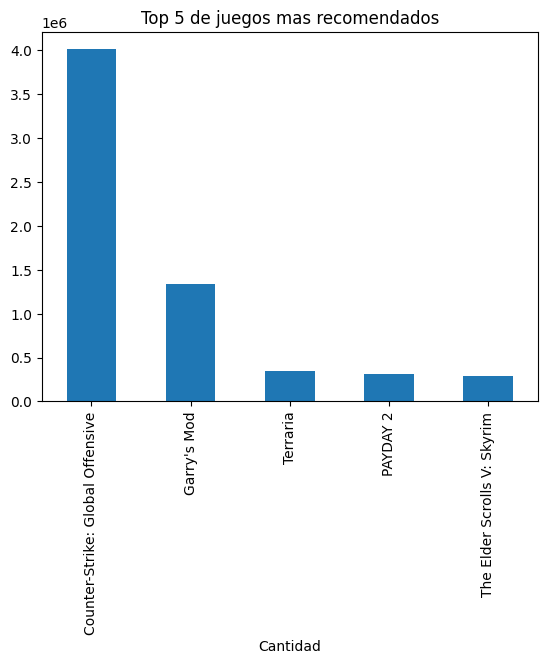

In [34]:
#Grafico de los 5 juegos más recomendados
recomendado = df_mr[df_mr['recommend']==True]
juegos_recomendados = recomendado.groupby(['item_name'])['recommend'].count().sort_values(ascending= False).head(5)
juegos_recomendados.plot(kind='bar')
plt.title('Top 5 de juegos mas recomendados')
plt.xlabel('Cantidad')
plt.xticks(rotation = 90)
plt.show()

In [35]:
juegos_recomendados = recomendado.groupby(['item_id'])['recommend'].count().sort_values(ascending= False).head(5)
juegos_recomendados

item_id
730       4003178
4000      1339575
105600     343425
218620     313950
72850      284340
Name: recommend, dtype: int64

In [36]:
df_mr.head()

,item_id,recommend,review,item_name,playtime_forever,playtime_2weeks
0,1250,True,2,Killing Floor,2497.0,0.0
1,1250,True,2,Killing Floor,1412.0,0.0
2,1250,True,2,Killing Floor,1584.0,0.0
3,1250,True,2,Killing Floor,2589.0,0.0
4,1250,True,2,Killing Floor,21690.0,0.0
